# **建立線性迴歸分析模型 Building LPM**

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression

temperatures = np.array([29, 28, 34, 31, 25, 29, 32, 31, 24, 33, 25, 31, 26, 30])
iced_tea_sales = np.array([77, 62, 93, 84, 59, 64, 80, 75, 58, 91, 51, 73, 65, 84])

lm = LinearRegression()
lm.fit(np.reshape(temperatures, (len(temperatures), 1)), np.reshape(iced_tea_sales, (len(iced_tea_sales), 1)))

# 印出係數 Print Coefficients
print(lm.coef_)

# 印出截距 Print Intercept
print(lm.intercept_ )

[[3.73788546]]
[-36.36123348]


# **利用線性迴歸分析模型預測 Predict using LPM**

In [8]:
# 新的氣溫 New Temperature
to_be_predicted = np.array([30])
predicted_sales = lm.predict(np.reshape(to_be_predicted, (len(to_be_predicted), 1)))

# 預測的冰紅茶銷量 Predicted Iced Tea Sales
print(predicted_sales)

[[75.7753304]]


# **線性迴歸視覺化 Visualization**


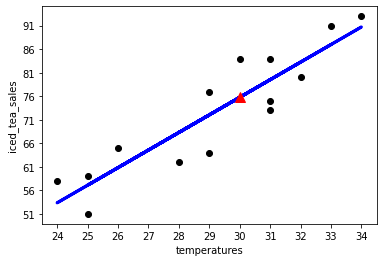

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

# 視覺化 Visualization
plt.scatter(temperatures, iced_tea_sales, color='black')
plt.plot(temperatures, lm.predict(np.reshape(temperatures, (len(temperatures), 1))), color='blue', linewidth=3)
plt.plot(to_be_predicted, predicted_sales, color = 'red', marker = '^', markersize = 10)
plt.xticks(np.arange(min(temperatures), max(temperatures)+1, step=1))
plt.yticks(np.arange(min(iced_tea_sales), max(iced_tea_sales)+1, step=5))
plt.xlabel('temperatures')
plt.ylabel('iced_tea_sales')
plt.show()

# **線性迴歸模型的績效 Evaluation (mse, r^2, and adjusted r^2)**

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

temperatures = np.array([29, 28, 34, 31, 25, 29, 32, 31, 24, 33, 25, 31, 26, 30])
iced_tea_sales = np.array([77, 62, 93, 84, 59, 64, 80, 75, 58, 91, 51, 73, 65, 84])

# 轉換維度 Reshaping
temperatures = np.reshape(temperatures, (len(temperatures), 1))
iced_tea_sales = np.reshape(iced_tea_sales, (len(iced_tea_sales), 1))

lm = LinearRegression()
lm.fit(temperatures, iced_tea_sales)

# 模型績效 Evaluation
mse = np.round(sum((iced_tea_sales - lm.predict(temperatures)) ** 2)/(len(temperatures)-2), 6)
r_squared = round(lm.score(temperatures, iced_tea_sales), 6)
adjusted_r_squared = np.round(1-(mse*(len(temperatures)-1)/sum((iced_tea_sales - np.mean(iced_tea_sales)) ** 2)), 6)

# 印出模型績效 Print Evaluation
print("mse =", mse)
print("r^2 =", r_squared)
print("adj.R^2 =", adjusted_r_squared)


mse = [32.590675]
r^2 = 0.822509
adj.R^2 = [0.807718]


# **單迴歸模型的係數檢定 Evaluation (testing coefficients)**

In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
import statsmodels.api as sm
from scipy import stats

X = np.array([29, 28, 34, 31, 25, 29, 32, 31, 24, 33, 25, 31, 26, 30])
y = np.array([77, 62, 93, 84, 59, 64, 80, 75, 58, 91, 51, 73, 65, 84])
X_2 = np.reshape(X, (len(X), 1))


lm = LinearRegression()
lm.fit(X_2, y)

params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X_2)

newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

X_to_Xbar = (X-np.mean(X))**2
X_variance = sum(X_to_Xbar)
Vb2 = MSE/X_variance
Vb1 = (MSE/len(X))+(Vb2 * (np.mean(X)**2))
var_b = np.array([Vb1,Vb2])
sd_b = np.sqrt(var_b)    #標準差 Standard Deviation
ts_b = params/ sd_b      #T值 T-value
p_values =[2*(stats.t.sf(np.abs(i),(len(newX)-2))) for i in ts_b]

sd_b = np.round(sd_b,8)
ts_b = np.round(ts_b,8)
p_values = np.round(p_values,8)
params = np.round(params,8)

from IPython.display import display

pd.options.display.float_format = '{:.8f}'.format
table = pd.DataFrame()
table.index = ["Intercept", "Temperature(X1)"]
table["Coefficients"],table["Standard Errors"],table["t-values"],table["P-values"] = [params,sd_b,ts_b,p_values]
display(table)

,Coefficients,Standard Errors,t-values,P-values
Intercept,-36.36123348,14.68726709,-2.47569771,0.02918726
Temperature(X1),3.73788546,0.50124814,7.45715573,0.00000766
